# Exploratory Data Analysis-Terrorism

# Import libraries

In [1]:
from os import walk
from os.path import join

import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
DATASET_PATH = 'globalterrorismdb_0718dist.csv'
TERRORIST_FILE = 'terrorist.png'
CITY_FILE = 'City.png'
FONT_FILE = 'Commissioner-ExtraBold.ttf'

# Import Data

In [3]:
DATASET_PATH = 'globalterrorism.csv'
data =pd.read_csv(DATASET_PATH, encoding='latin1')

In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.shape

(181691, 135)

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Data Cleaning

In [7]:
data.rename(columns={'iyear': 'Year',
                     'imonth': 'Month',
                     'iday': 'Day',
                     'country_txt': 'Country',
                     'provstate': 'State',
                     'region_txt': 'Region',
                     'city': 'City',
                     'attacktype1_txt': 'AttackType',
                     'target1': 'Target',
                     'nkill': 'Killed',
                     'nwound': 'Wounded',
                     'summary': 'Summary',
                     'gname': 'Group',
                     'targtype1_txt': 'Target_type',
                     'weaptype1_txt': 'Weapon_type',
                     'motive': 'Motive'
                    }, inplace=True)

In [8]:
data1 = data[['Year','Month','Day','Country','State','Region','City','latitude',
              'longitude','AttackType','Target','Killed','Wounded','Summary','Group',
              'Target_type','Weapon_type','Motive','suicide'
             ]]
data1.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive,suicide
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [9]:
# Selected data shape
data1.shape

(181691, 19)

In [10]:
# Checking for null values
data1.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
latitude         4556
longitude        4557
AttackType          0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
suicide             0
dtype: int64

# Exploratory Data Analysis

# Most terrorism attacks

In [11]:
data1['Region'].value_counts().index[0]

'Middle East & North Africa'

In [12]:
data1['Region'].value_counts().max()

50474

# City, village, or town in which incident occured

In [13]:
data1['City'].value_counts().index[0]

'Unknown'

In [14]:
data1['City'].value_counts().max()


9775

In [15]:
data1['City'].value_counts().index[1]

'Baghdad'

# Most notably used weapons

In [16]:
data1['Weapon_type'].value_counts().index[0]

'Explosives'

In [17]:
data1['Weapon_type'].value_counts().max()

92426

# Most known country for terror attacks

In [18]:
data1['Country'].value_counts().index[0]

'Iraq'

In [19]:
data1['Country'].value_counts().max()

24636

# Ratio of suicide attack incident
# 0 - Not a suicide attack 1 - Was a suicide attack

In [20]:
data1['suicide'].value_counts().sum()

181691

In [21]:
suicide_attack = data1.groupby('suicide').size()

In [22]:
suicide_attack

suicide
0    175058
1      6633
dtype: int64

In [23]:
# Not a suicide attack
suicide_attack[0]

175058

In [24]:
suicide_attack_ratio = suicide_attack[1] / data1['suicide'].value_counts().sum() * 100
suicide_attack_ratio

3.6507036672152173

# Target type

In [25]:
target_type = data1.groupby('Target_type').size()
target_type = target_type.sort_values(ascending=False)
target_type

Target_type
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
dtype: int64

In [26]:
data1['Target_type'].value_counts().index[0]

'Private Citizens & Property'

In [27]:
target_type[0] / data1['Target_type'].value_counts().sum() * 100

23.947801487140254

In [28]:
data1['Target_type'].value_counts().index[1]

'Military'

In [29]:
target_type[1] / data1['Target_type'].value_counts().sum() * 100

15.401973680589572

# Death, Wounded and Casualties by Region

In [30]:
# Adding Casualities column in our data set
data1['Casualities'] = data1['Killed'] + data1['Wounded']

data_region_wise = data1[['Region', 'Killed', 'Wounded', 'Casualities']].copy()
data_region_wise = data_region_wise.groupby(by=['Region']).sum()
data_region_wise

,Killed,Wounded,Casualities
Region,,,
Australasia & Oceania,150.0,260.0,409.0
Central America & Caribbean,28708.0,8991.0,34530.0
Central Asia,1000.0,2009.0,2969.0
East Asia,1152.0,9213.0,10003.0
Eastern Europe,7415.0,12045.0,18239.0
Middle East & North Africa,137642.0,214308.0,329807.0
North America,4916.0,21531.0,26398.0
South America,28849.0,16704.0,43562.0
South Asia,101319.0,141360.0,234366.0


# Visualization

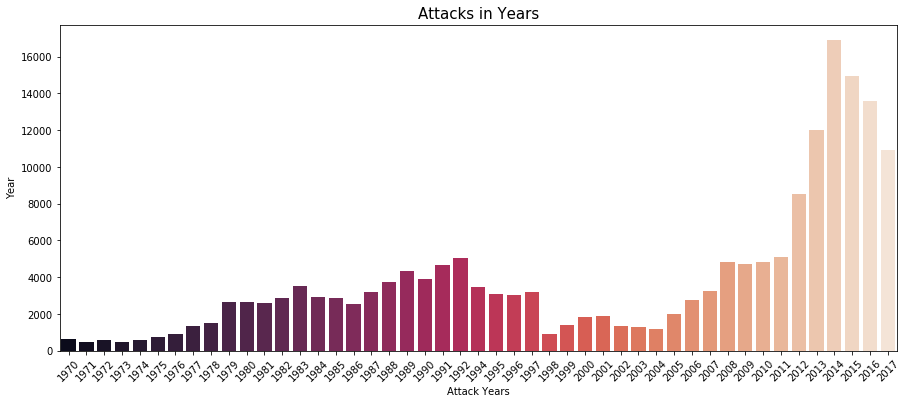

In [31]:
x_year = data1['Year'].unique()
y_year = data1['Year'].value_counts().sort_index()

# Plot Setting
plt.figure(figsize=(15,6))
plt.title('Attacks in Years', fontsize=15)
plt.xlabel('Attack Years')
plt.ylabel('Number of attacks in each year')
plt.xticks(rotation=45)

# Bar plot
sns.barplot(x=x_year, y=y_year, palette='rocket')

plt.show()

# Terrorist Activities by Region

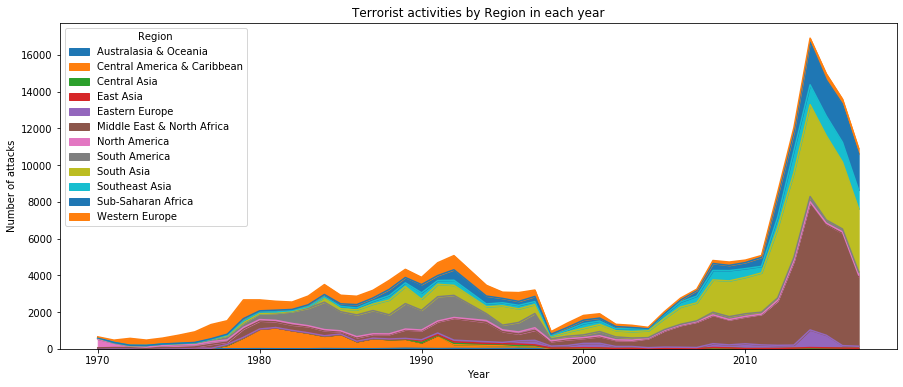

In [32]:
pd.crosstab(data1.Year, data1.Region).plot(kind='area', figsize=(15,6))

plt.title('Terrorist activities by Region in each year')
plt.ylabel('Number of attacks')

plt.show()

# World's most Targetted Regions/Country

In [33]:
most_targeted_countries = data1['Country'].value_counts()
most_targeted_countries[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [34]:
# Extracting top 10 targetted countries attack data
most_targeted_countries = data1[(data1.Country == 'Iraq') | 
                                (data1.Country == 'Pakistan') | 
                                (data1.Country == 'Afghanistan') |
                                (data1.Country == 'India') |
                                (data1.Country == 'Colombia') |
                                (data1.Country == 'Philippines') |
                                (data1.Country == 'Peru') |
                                (data1.Country == 'El Salvador') |
                                (data1.Country == 'United Kingdom') |
                                (data1.Country == 'Turkey')
                               ]
most_targeted_countries.shape

(99852, 20)

In [35]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import plotly.express as px

# Assuming you have already defined 'most_targeted_countries' and 'geography'...

geography = most_targeted_countries.head(5000)
geography = geography[['latitude', 'longitude']]

fig = px.scatter_geo(geography, lat='latitude', lon='longitude')

fig.show()


ModuleNotFoundError: No module named 'plotly'

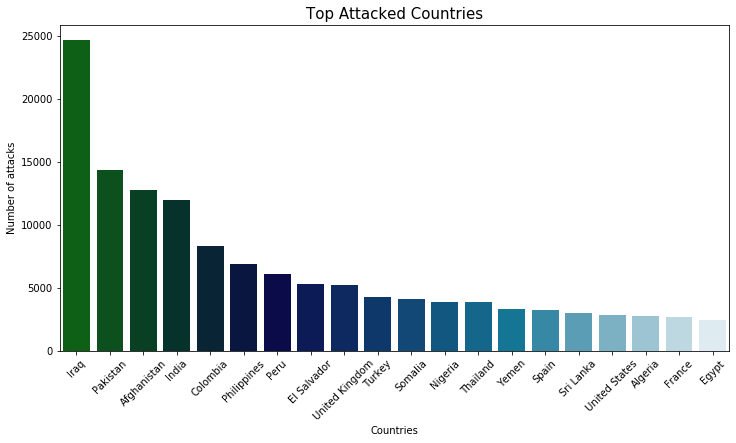

In [37]:
# Extracting top 20 countries data
most_targeted_countries = data1['Country'].value_counts()[:20]

# Bar plot
plt.subplots(figsize=(12,6))
sns.barplot(most_targeted_countries.index, most_targeted_countries.values,palette='ocean')

# Setting plotting properties
plt.title('Top Attacked Countries', fontsize=15)
plt.xlabel('Countries')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.show()

# Attacking Groups most involved

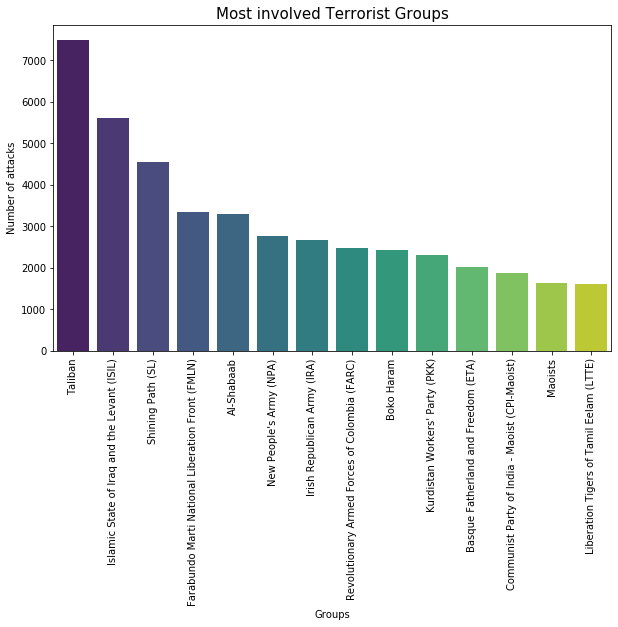

In [38]:
attacking_groups = data1.Group.value_counts()[1:15]

# Bar plot
plt.subplots(figsize=(10,6))
sns.barplot(attacking_groups.index, attacking_groups.values,palette='viridis')

# Setting plotting properties
plt.title('Most involved Terrorist Groups', fontsize=15)
plt.xlabel('Groups')
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.show()

# Most Activities of Terrorist Groups

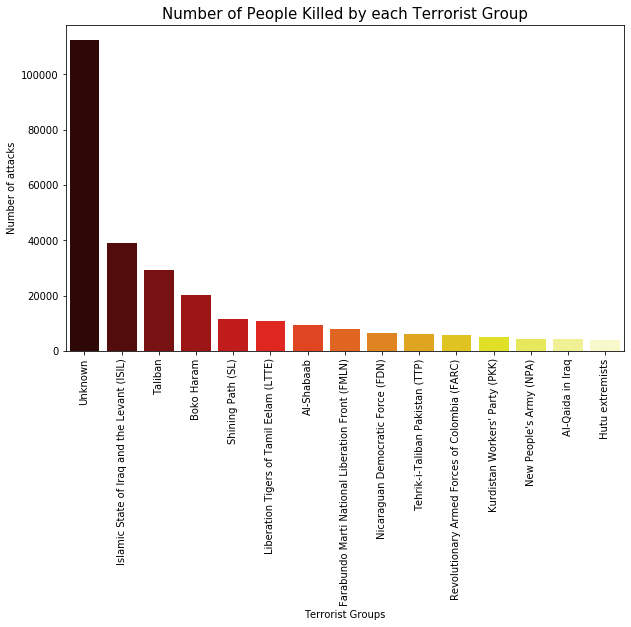

In [39]:
people_killed_by_groups = data1[['Group', 'Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(15)

# Bar plot
plt.subplots(figsize=(10,6))
sns.barplot(people_killed_by_groups.index, 
            people_killed_by_groups.Killed.values,
            palette='hot')

# Setting plotting properties
plt.title('Number of People Killed by each Terrorist Group', fontsize=15)
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.show()

# Most Affected Cities

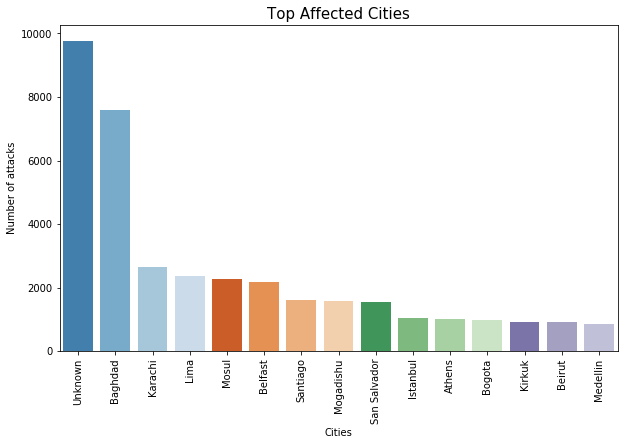

In [40]:
most_affected_cities = data1.City.value_counts()[:15]

# Bar plot
plt.subplots(figsize=(10,6))
sns.barplot(most_affected_cities.index, 
            most_affected_cities.values,
            palette='tab20c')

# Setting plotting properties
plt.title('Top Affected Cities', fontsize=15)
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.show()

# Most used Attack Types

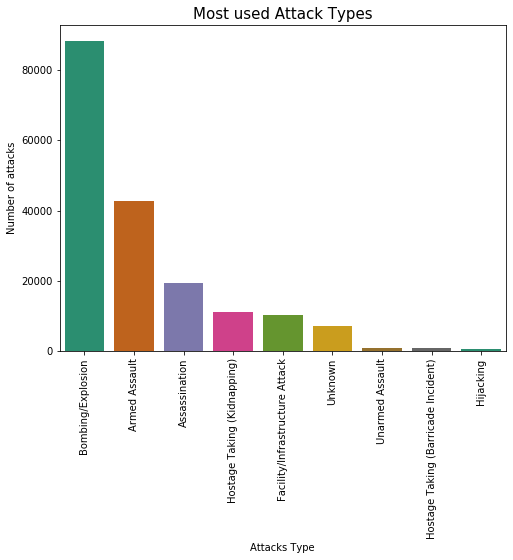

In [41]:
attacks = data1['AttackType'].value_counts()

# Bar plot
plt.subplots(figsize=(8,6))
sns.barplot(attacks.index, 
            attacks.values,
            palette='Dark2')

# Setting plotting properties
plt.title('Most used Attack Types', fontsize=15)
plt.xlabel('Attacks Type')
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.show()

# Most used Weapons

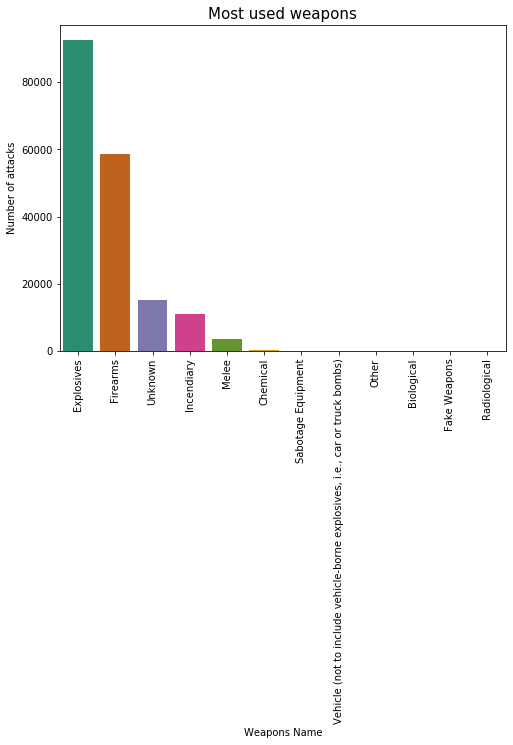

In [42]:
weapons = data1['Weapon_type'].value_counts()

# Bar plot
plt.subplots(figsize=(8,6))
sns.barplot(weapons.index, 
            weapons.values,
            palette='Dark2')

# Setting plotting properties
plt.title('Most used weapons', fontsize=15)
plt.xlabel('Weapons Name')
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.show()

# Word Cloud

In [43]:
most_involved_terrorist_groups = data1.Group.dropna(False)
most_involved_terrorist_groups = most_involved_terrorist_groups.to_numpy()

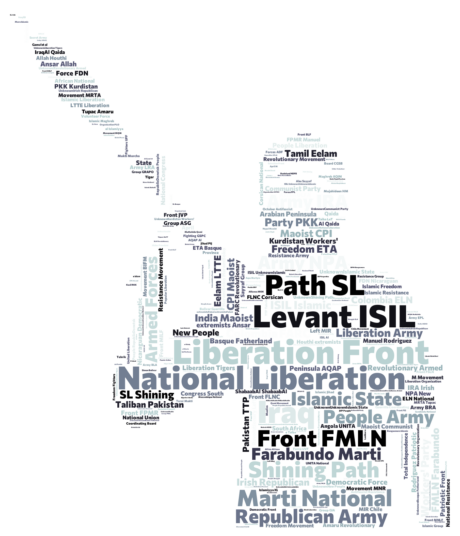

In [44]:
icon = Image.open(TERRORIST_FILE).convert('RGBA')
image_mask = Image.new(mode='RGBA', size=icon.size, color=(255,255,255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask) #convert img obj to arr

word_cloud = WordCloud(mask=rgb_array, background_color='white',
                       max_words=350, font_path=FONT_FILE, colormap='bone')

word_cloud.generate(''.join(most_involved_terrorist_groups))

plt.figure(figsize=[8,16])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')  #To hide axis
plt.show()

In [45]:
most_affected_cities = data1.City.dropna(False)
most_affected_cities = most_affected_cities.to_numpy()

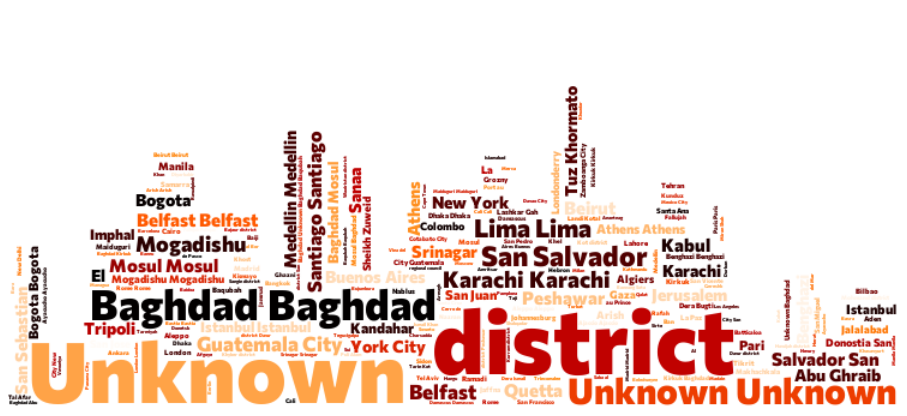

In [46]:
icon = Image.open(CITY_FILE).convert('RGBA')
image_mask = Image.new(mode='RGBA', size=icon.size, color=(255,255,255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask) #convert img obj to arr

word_cloud = WordCloud(mask=rgb_array, background_color='white',
                       max_words=5000, font_path=FONT_FILE, colormap='gist_heat')

word_cloud.generate(' '.join(most_affected_cities))

plt.figure(figsize=[16,9])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')  #To hide axis
plt.show()

# Conclusion and Results:

- Country with most attacks: **Iraq**
- City with most attacks: **Baghdad**
- Region with most attacks: **Middle East and North Africa**
- Year with most attacks: **2014**
- Month with most attacks: **5**
- Group with most attacks: **Taliban**
- Most attack types: **Bombing/Explosions**